In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from adjustText import adjust_text

In [3]:
data1 = pd.read_csv('nearest_2000_starsa.csv')
# data1.columns = ['Name', 'Mag', 'Colour']
print(data1.lum, data1.Tefff)

0       0.000058
1       0.440961
2       1.543121
3       0.000443
4       0.000021
          ...   
1994    0.104328
1995    0.039664
1996    0.014282
1997    0.439339
1998    0.000970
Name: lum, Length: 1999, dtype: float64 0       3383.441193
1       4996.415833
2       5567.728737
3       3691.168543
4       3169.353727
           ...     
1994    4250.693596
1995    3801.042587
1996    3826.899848
1997       0.000000
1998    3621.507053
Name: Tefff, Length: 1999, dtype: float64


In [4]:
# Star Names
star_names = ["Arcturus", "Rigel", "Betelgeuse", "Antares", "Regulus", "Polaris", "Sirius B", "δ Cephei"]

# Effective Temperature (Teff) in Kelvin
Teff = [4286, 11000, 3500, 3660, 12460, 6015, 25200, 5500]  # δ Cephei varies, so 5500 is an approximation

# Luminosity compared to the Sun (L☉)
Luminosity = [170, 120000, 100000, 75900, 288, 2500, 0.056, 2000]

log_Luminosity = np.log10(Luminosity)
log_Teff = np.log10(Teff)

print(log_Luminosity)

# B-V Color Index
B_V = [1.23, -0.03, 1.85, 1.83, -0.13, 0.60, 0.29, 0.90]


[ 2.23044892  5.07918125  5.          4.88024178  2.45939249  3.39794001
 -1.25181197  3.30103   ]


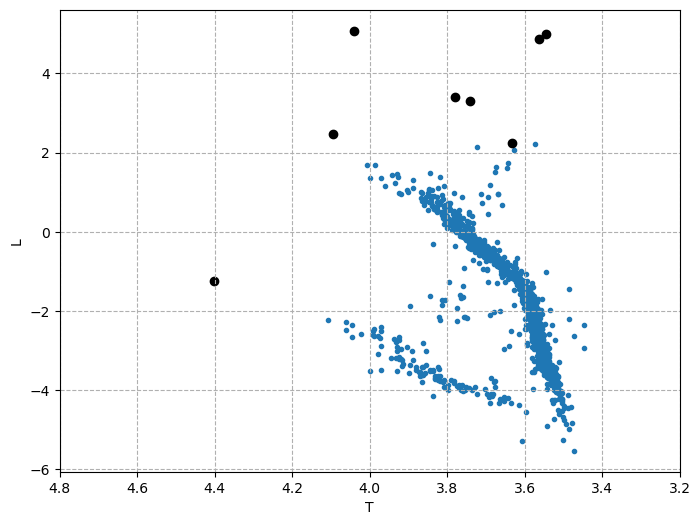

In [13]:
plt.figure(figsize=(8,6))

loglum = np.log10(data1.lum)
logtefff = np.log10(data1.Tefff)

plt.scatter(logtefff, loglum, marker='.')
# plt.yticks(data.Colour)
# plt.xticks(np.arange(12,24,1))
# plt.yticks(np.arange(0,20,0.01))

plt.scatter(log_Teff, log_Luminosity , color = 'k', label = "special stars")

# for i in range (0,8):
#     plt.annotate(star_names[i], (log_Teff[i], log_Luminosity[i]))



plt.xlim(4.8,3.2)
# # plt.ylim(0.5,20)



plt.xlabel('T')
plt.ylabel('L')
# plt.title('Temperature vs Luminosity')
plt.grid(True, linestyle= '--')

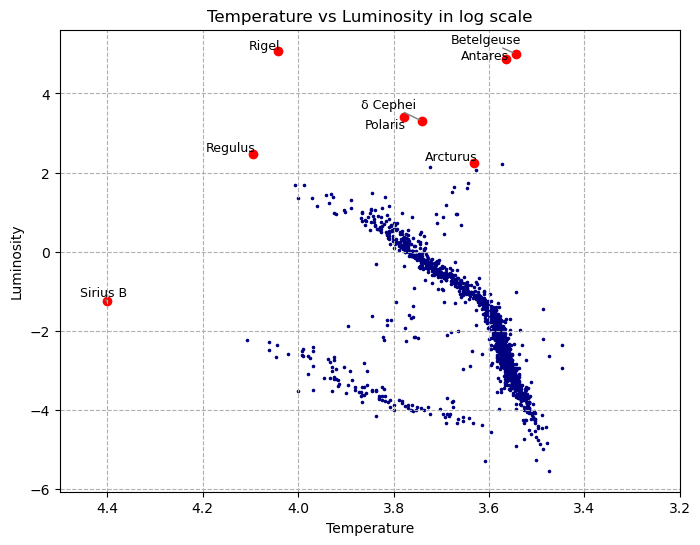

In [6]:
plt.figure(figsize=(8,6))

loglum = np.log10(data1.lum)

plt.scatter(logtefff, loglum, marker='.', color = 'navy', s=10)
# plt.yticks(data.Colour)
# plt.xticks(np.arange(12,24,1))
# plt.yticks(np.arange(0,20,0.01))

plt.scatter(log_Teff, log_Luminosity , color = 'red', label = "special stars")


# List to store annotation objects
texts = []

# Add annotations without overlap
for i, name in enumerate(star_names):
    text = plt.annotate(name, (log_Teff[i], log_Luminosity[i]),  fontsize=9, color='black')
    texts.append(text)

# Adjust text positions to prevent overlap
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray'))

plt.xlim(4.5,3.2)
# plt.ylim(0.5,20)



plt.xlabel('Temperature')
plt.ylabel('Luminosity')
plt.title('Temperature vs Luminosity in log scale')
plt.grid(True, linestyle= '--')

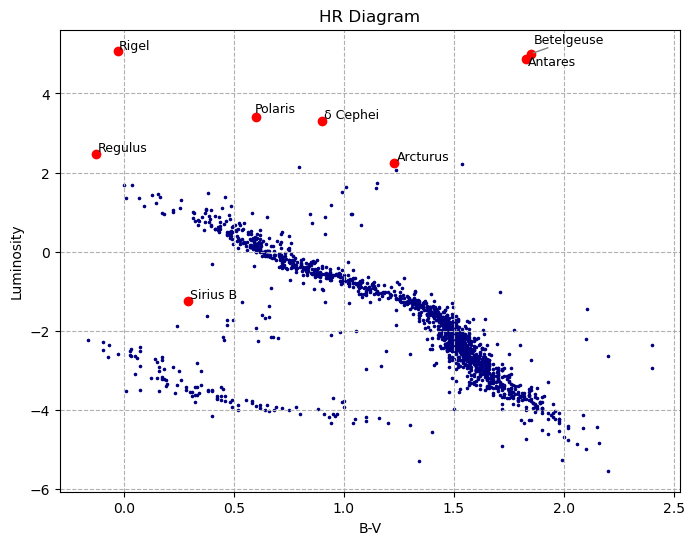

In [7]:
plt.figure(figsize=(8,6))

plt.scatter(data1.ci, loglum, marker='.', color = 'navy', s=10)
# plt.yticks(data.Colour)
# plt.xticks(np.arange(12,24,1))
# plt.yticks(np.arange(0,20,0.01))

# plt.xlim(2500,10000)
# plt.ylim(0.05,20)

plt.scatter(B_V , log_Luminosity , color = 'red', label = "special stars")

# List to store annotation objects
texts = []

# Add annotations without overlap
for i, name in enumerate(star_names):
    text = plt.annotate(name, (B_V[i], log_Luminosity[i]),  fontsize=9, color='black')
    texts.append(text)

# Adjust text positions to prevent overlap
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray'))



# plt.xlim(26000,2000)
# plt.ylim(0.5,20)

plt.xlabel('B-V')
plt.ylabel('Luminosity')
plt.title('HR Diagram')
plt.grid(True, linestyle= '--')

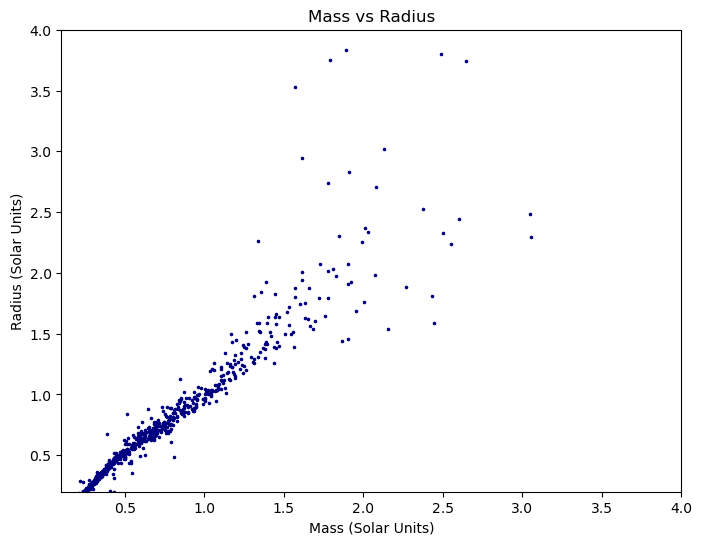

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(data1.Mass, data1.Radius, marker= '.', s= 10, color = 'navy')

plt.xlim(0.1,4)
plt.ylim(0.2,4)

plt.xlabel('Mass (Solar Units)')
plt.ylabel('Radius (Solar Units)')
plt.title('Mass vs Radius')

plt.show()

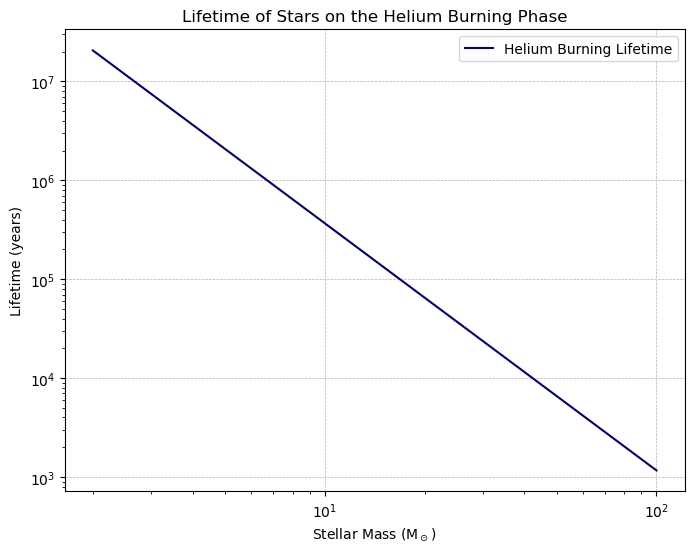

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Mass range (in solar masses)
M_solar = np.logspace(np.log10(2), np.log10(100), 100)

# Main Sequence lifetime (approximate scaling relation)
t_MS = 12.4e9 * (M_solar ** -2.5)  # in years

# Helium burning lifetime (0.94% of Main Sequence lifetime)
t_He = 0.0094 * t_MS

# Plot
plt.figure(figsize=(8,6))
plt.loglog(M_solar, t_He, label="Helium Burning Lifetime", linestyle="-", color="navy")
# plt.loglog(M_solar, t_MS, label="Main Sequence Lifetime", linestyle="-", color="blue")

plt.xlabel("Stellar Mass (M$_\odot$)")
plt.ylabel("Lifetime (years)")
plt.title("Lifetime of Stars on the Helium Burning Phase")
plt.legend()
plt.grid(True, which="major", linestyle="--", linewidth=0.5)
plt.show()
